In [541]:
%matplotlib inline
import pandas as pd
import pandas_profiling as pp
import numpy as np # linear algebra
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MultiLabelBinarizer 
import seaborn as sns
import tkinter
import matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt
data = pd.read_csv('final_dataset.csv')
# pp.ProfileReport(data, minimal=True)

In [542]:
data['count'] = 1
data['first_country'] = data['country'].apply(lambda x: x.split(",")[0])
data['first_country'].replace('United States', 'USA', inplace=True)
data['first_country'].replace('United Kingdom', 'UK',inplace=True)
data['first_country'].replace('South Korea', 'S. Korea',inplace=True)
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

In [543]:
data.columns

Index(['type', 'imdb_id', 'title', 'director', 'director_gender', 'cast',
       'distributor', 'country', 'languages', 'release_year', 'rating',
       'duration', 'listed_in', 'netflix', 'amazon', 'date_added_netflix',
       'date_added_amazon', 'imDbRating', 'imDbRatingVotes', 'rottenTomatoes',
       'budget', 'gross', 'description', 'keywords', 'awards',
       'special_award_name', 'special_award_tot', 'special_award_stat',
       'award_nomination_tot', 'award_win_tot', 'count', 'first_country'],
      dtype='object')

In [262]:
x= data.groupby(['type'])[['type']].count()
y=len(data)
r=((x/y)).round(2)

ratio = pd.DataFrame(r)
ratio

,type
type,
Movie,0.78
TV Show,0.22


In [263]:
fig = px.pie(ratio, values='type', names=ratio.index)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_color='#000000', textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Movie & TV Show distribution<br><sup>We see vastly more movies than TV shows on Streaming Service.</sup>')
fig.show()
fig.write_html("visualization/one.html")

In [267]:
x= data.groupby(['type'])[['amazon', 'netflix']].sum()
y=len(data)
r=((x*100/y)).round(2)

ratio = pd.DataFrame(r)
ratio

,amazon,netflix
type,,
Movie,35.80,43.78
TV Show,5.85,16.37


In [265]:
df = pd.DataFrame()
df['val'] = [35.80, 5.85, 43.78, 16.37]
df['type'] = ['Movie', 'TV Show', 'Movie', 'TV Show']
df['distributer'] = ['Amazon', 'Amazon', 'Netflix', 'Netflix']

df

,val,type,distributer
0,35.80,Movie,Amazon
1,5.85,TV Show,Amazon
2,43.78,Movie,Netflix
3,16.37,TV Show,Netflix


In [266]:
fig = px.sunburst(df, path=['type', 'distributer'], values='val', color='val', hover_data=['val'], color_continuous_scale=colors)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Movie & TV Show distribution<br><sup>We see vastly more movies than TV shows on Streaming Service.</sup>')
fig.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Top 10 Cuntry

In [95]:
df = data.copy()
df['country'].replace('no_data', np.nan, inplace  = True)
df.dropna(inplace=True)
df = pd.DataFrame(df.groupby('first_country')['count'].sum().sort_values(ascending=False)[0:10])
df

,count
first_country,
USA,3240
India,1156
UK,619
Canada,279
France,168
S. Korea,146
Spain,125
Australia,124
Germany,92


In [96]:
fig = go.Figure(data=[go.Bar(x=df.index, y=df['count'].to_list(),
            hovertext=['total ammount', '24% market share', '19% market share'])])

fig.update_traces(marker_color=colors, textfont_color='#000000', textfont_size=20, marker_line=dict(color='#000000', width=2))
fig.update_layout(title_text='Top 10 countries on Streaming Service<br><sup>The four most frequent countries have been highlighted.</sup>')

# fig.update_text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')
fig.show()

# Top 10 languages

In [97]:
df = data.copy()
df['languages'].replace('no_data', np.nan, inplace  = True)
df.dropna(inplace=True)
df['first_lang'] = df['languages'].apply(lambda x: x.split(",")[0])
df = pd.DataFrame(df.groupby('first_lang')['count'].sum().sort_values(ascending=False)[0:10])
df

,count
first_lang,
English,4636
Hindi,745
Spanish,256
Tamil,192
Korean,137
French,128
Mandarin,84
Arabic,74
Cantonese,69


In [98]:
df2 = data.copy()
df2['languages'].replace('no_data', np.nan, inplace  = True)
df2.dropna(inplace=True)
languages = []
for i, x in df2['languages'].iteritems():
    l = x.split(', ')
    for lang in l:
        languages.append(lang)
df = pd.DataFrame()
df['languages'] = languages
df['count'] = 1
df = pd.DataFrame(df.groupby('languages')['count'].sum().sort_values(ascending=False)[0:10])
df

,count
languages,
English,5264
Hindi,799
Spanish,574
French,519
German,272
Tamil,219
Mandarin,172
Arabic,171
Italian,165


In [99]:
fig = go.Figure(data=[go.Bar(x=df.index, y=df['count'].to_list(),
            hovertext=['total ammount', '24% market share', '19% market share'])])

fig.update_traces(marker_color=colors, textfont_color='#000000', textfont_size=20, marker_line=dict(color='#000000', width=2))
fig.update_layout(title_text='Top 10 languages on Streaming Service<br><sup>The four most frequent countries have been highlighted.</sup>')

# fig.update_text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')
fig.show()

# Rating Distribution

In [100]:
data['rating']

0             Adults 18+
1             Adults 18+
2       Young Adults 16+
3              Teens 13+
4             Adults 18+
              ...       
8307            Kids All
8308    Young Adults 16+
8309          Adults 18+
8310          Adults 18+
8311          Adults 18+
Name: rating, Length: 8312, dtype: object

In [101]:
df = data.copy()
df['rating'].replace('no_data', np.nan, inplace  = True)
df.dropna(inplace=True)
order = pd.DataFrame(df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

order

,rating,count
0,Adults 18+,3654
1,Young Adults 16+,1724
2,Teens 13+,1408
3,Older Kids 7+,954
4,Kids All,450
5,Unrated,120


In [102]:
mf = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]
movie = mf.loc['Movie']
tv = - mf.loc['TV Show']
mf

rating,Adults 18+,Young Adults 16+,Teens 13+,Older Kids 7+,Kids All,Unrated
type,,,,,,
Movie,2895,1230,1344,645,266,102
TV Show,759,494,64,309,184,18


In [103]:
fig = go.Figure()
fig.add_trace(go.Bar(x=mf.columns, y= mf.loc['Movie'],
                base=0,
                marker_color='gold',
                name='Movie'))
fig.add_trace(go.Bar(x=mf.columns,  y= mf.loc['TV Show'],
                base=[-759, -494, -64, -309, -184, -18],
                marker_color='mediumturquoise',
                name='TV Shows'
                ))
fig.update_traces( textfont_color='#000000', textfont_size=20, marker_line=dict(color='#000000', width=2))
fig.update_layout(title_text='Rating distribution by Film & TV Show<br><sup>We observe that most movies are for adults, there is a lack of TV Shows for teens</sup>')


fig.show()

# Director Gender Distribution

In [275]:
df = data.copy()
df['director_gender'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['director_gender'])
gender = []
type = []
for i, x in df['director_gender'].iteritems():
    x = x.split(', ')
    for gen in x:
        gender.append(gen)
        if df['type'][i] == 'TV Show':
            type.append('TV Show')
        if df['type'][i] == 'Movie':
            type.append('Movie')
df = pd.DataFrame()
df['type'] = type
df['gender'] = gender
df['count'] = 1
df


,type,gender,count
0,TV Show,male,1
1,Movie,male,1
2,TV Show,male,1
3,Movie,male,1
4,Movie,male,1
...,...,...,...
7118,Movie,male,1
7119,TV Show,male,1
7120,Movie,female,1
7121,Movie,male,1


In [276]:
order = pd.DataFrame(df.groupby('gender')['count'].sum().sort_values(ascending=False).reset_index())
gender_order = list(order['gender'])
order

,gender,count
0,male,5975
1,female,886
2,unknown,256
3,transgender female,4
4,non-binary,2


In [279]:
fig = px.pie(order, values='count', names='gender')
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_color='#000000', textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Movie & TV Show distribution<br><sup>We see vastly more movies than TV shows on Streaming Service.</sup>')
fig.show()

In [277]:
x= df.groupby(['gender'])[['gender']].count()
y=len(df)
r=((x/y)).round(2)

ratio = pd.DataFrame(r)
ratio

,gender
gender,
female,0.12
male,0.84
non-binary,0.00
transgender female,0.00
unknown,0.04


In [278]:
fig = px.pie(ratio, values='gender', names=ratio.index)
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_color='#000000', textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Movie & TV Show distribution<br><sup>We see vastly more movies than TV shows on Streaming Service.</sup>')
fig.show()

In [312]:
df = data.copy()
df['director_gender'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['director_gender'])
gender = []
type = []
for i, x in df['director_gender'].iteritems():
    x = x.split(', ')
    for gen in x:
        gender.append(gen)
        if df['type'][i] == 'TV Show':
            type.append('TV Show')
        if df['type'][i] == 'Movie':
            type.append('Movie')
df = pd.DataFrame()
df['type'] = type
df['gender'] = gender
df['count'] = 1
df

,type,gender,count
0,TV Show,male,1
1,Movie,male,1
2,TV Show,male,1
3,Movie,male,1
4,Movie,male,1
...,...,...,...
7118,Movie,male,1
7119,TV Show,male,1
7120,Movie,female,1
7121,Movie,male,1


In [313]:
gender_order = df['gender'].value_counts().index
data_q2q3 = df[['type', 'gender']].groupby('gender')['type'].value_counts().unstack().loc[gender_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]
data_q2q3_ratio

type,Movie,TV Show
non-binary,0.500000,0.500000
female,0.911964,0.088036
male,0.926527,0.073473
unknown,0.933594,0.066406
transgender female,1.000000,NaN


/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/2692407875.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



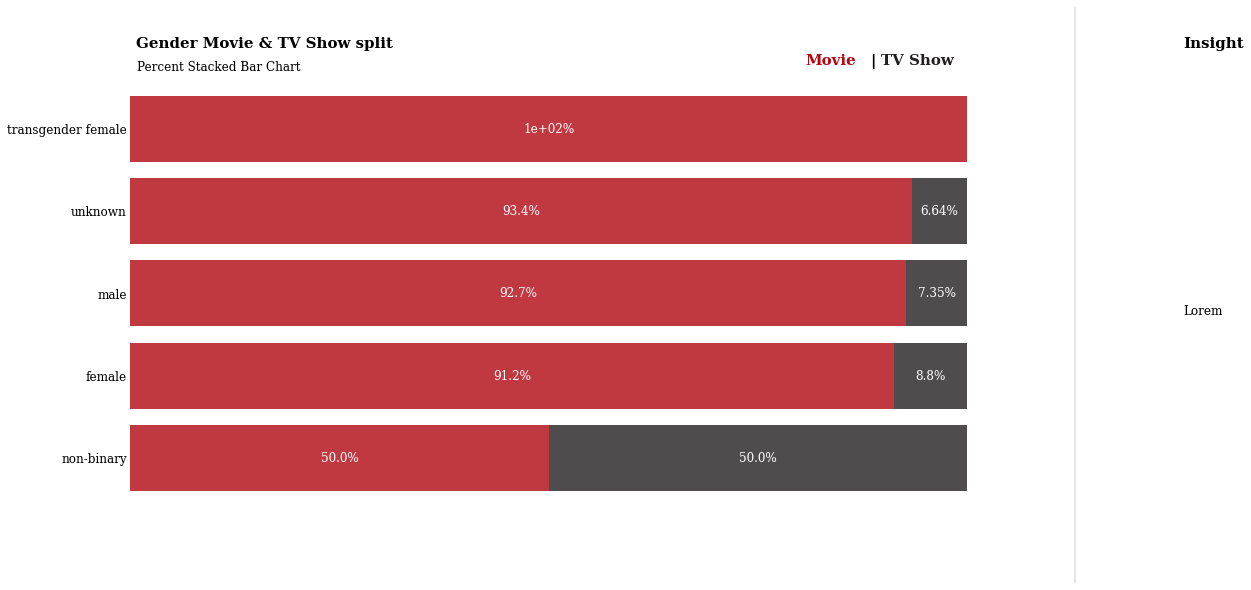

In [314]:
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Gender Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.44, '''
Lorem
'''
         , fontsize=12, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])




ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [373]:
df = data.copy()
df['director_gender'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['director_gender'])
gender = []
release_year = []
for i, x in df['director_gender'].iteritems():
    x = x.split(', ')
    for gen in x:
        gender.append(gen)
        year = df._get_value(i, 'release_year')
        release_year.append(year)

df = pd.DataFrame()
df['release_year'] = release_year
df['gender'] = gender
df['count'] = 1
df


,release_year,gender,count
0,2021.0,male,1
1,1993.0,male,1
2,2021.0,male,1
3,2021.0,male,1
4,2021.0,male,1
...,...,...,...
7118,2021.0,male,1
7119,1983.0,male,1
7120,2021.0,female,1
7121,2008.0,male,1


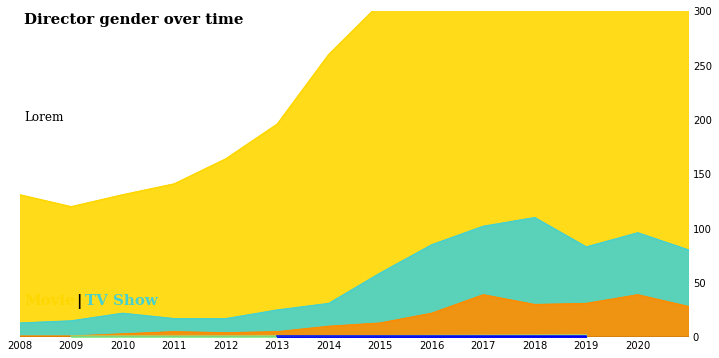

In [324]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'blue']

for i, mtv in enumerate(df['gender'].value_counts().index):
    mtv_rel = df[df['gender']==mtv]['release_year'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=colors[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=colors[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.set_ylim(0, 300)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2021)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Director gender over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, 
'''Lorem
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='gold')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='mediumturquoise')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [374]:


df = df[['release_year', 'gender']].groupby('gender')['release_year'].value_counts().unstack().loc[gender_order]
df = df.stack().reset_index()
df.columns = ['gender','year','val']
df = df[(df.year >= 2006)&(df.year < 2022)]
df

,gender,year,val
83,male,2006.0,100.0
84,male,2007.0,109.0
85,male,2008.0,131.0
86,male,2009.0,120.0
87,male,2010.0,131.0
88,male,2011.0,141.0
89,male,2012.0,164.0
90,male,2013.0,196.0
91,male,2014.0,260.0
92,male,2015.0,307.0


In [376]:
fig = px.line(df, x='year', y='val', color='gender', title='Director gender over years')
fig.show()

# Distribution Movie & TV Show over years

In [111]:
df = data.copy()
df['date_added_netflix'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['date_added_netflix'])
df['date_added_netflix'] = pd.to_datetime(df['date_added_netflix'])
df['year_added_netflix'] = df['date_added_netflix'].dt.year


### netflix addition over year 

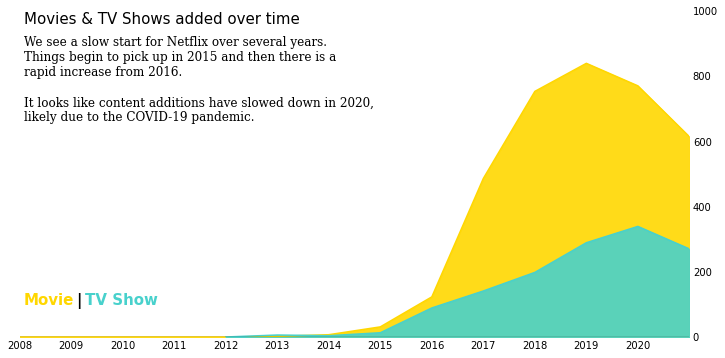

In [112]:

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added_netflix'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=colors[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=colors[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.set_ylim(0, 1000)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2021)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15)
fig.text(0.13, 0.59, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold",  fontsize=15, color='gold')
fig.text(0.19,0.2,"|", fontweight="bold",  fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold",  fontsize=15, color='mediumturquoise')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [113]:
df = data.copy()
df['date_added_amazon'].replace('no_data', np.nan, inplace  = True)
df['date_added_amazon'] = pd.to_datetime(df['date_added_amazon'])
df['year_added_amazon'] = df['date_added_amazon'].dt.year

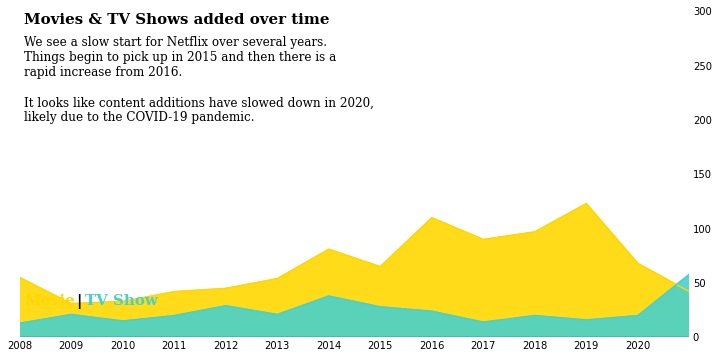

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added_amazon'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=colors[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=colors[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.set_ylim(0, 300)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2021)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='gold')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='mediumturquoise')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# Distribution Movie & TV Show added over month

In [115]:
df = data.copy()
df['date_added_netflix'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['date_added_netflix'])
df['date_added_netflix'] = pd.to_datetime(df['date_added_netflix'])
df['month_added_netflix']=df['date_added_netflix'].dt.month
df['month_added_netflix']=df['date_added_netflix'].dt.month_name()
df['month_added_netflix']

month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_added_netflix'], categories=month_order, ordered=True)

/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/2923628399.py:22: UserWarning:

FixedFormatter should only be used together with FixedLocator



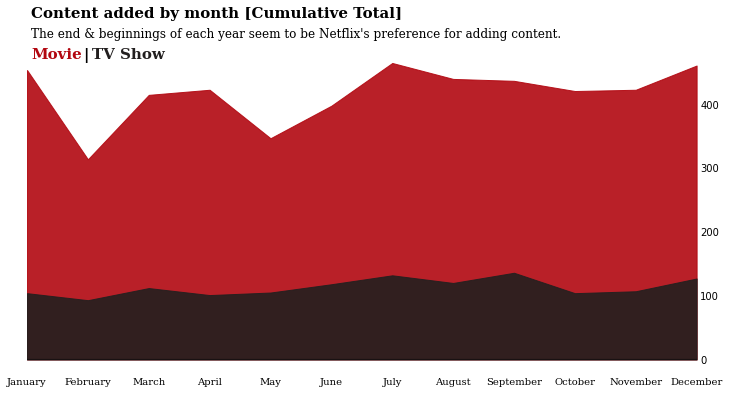

In [116]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

#ax.set_xlim(2008,2020)
#plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.95, 'Content added by month [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.905, 
"The end & beginnings of each year seem to be Netflix's preference for adding content."

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.855,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.855,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.855,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [117]:
df = data.copy()
df['date_added_amazon'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['date_added_amazon'])
df['date_added_amazon'] = pd.to_datetime(df['date_added_amazon'])
df['month_added_amazon']=df['date_added_amazon'].dt.month
df['month_added_amazon']=df['date_added_amazon'].dt.month_name()
df['month_added_amazon']

month_order = ['January','February','March','April','May','June','July','August','September','October','November', 'December']

df['month_name_added'] = pd.Categorical(df['month_added_amazon'], categories=month_order, ordered=True)

In [118]:
df[['month_name_added', 'type']]

,month_name_added,type
17,August,Movie
50,September,Movie
55,August,Movie
92,October,Movie
106,August,TV Show
...,...,...
8295,August,Movie
8297,July,TV Show
8300,December,Movie
8309,March,Movie


/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/2923628399.py:22: UserWarning:

FixedFormatter should only be used together with FixedLocator



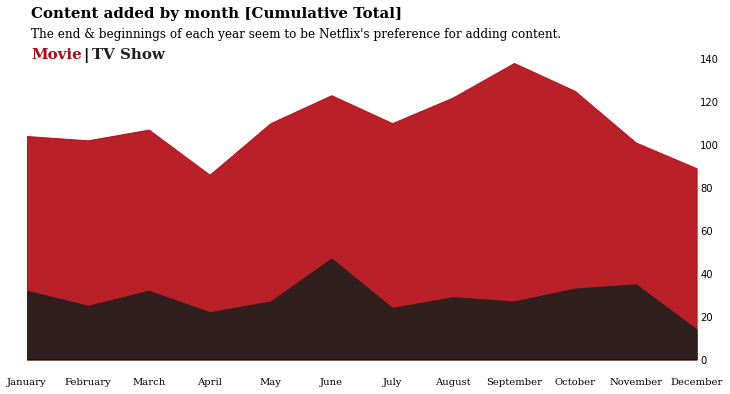

In [119]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

#ax.set_xlim(2008,2020)
#plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.95, 'Content added by month [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.905, 
"The end & beginnings of each year seem to be Netflix's preference for adding content."

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.855,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.855,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.855,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# Genre over month 

In [476]:
df = data.copy()
df['date_added_amazon'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['date_added_amazon'])
df['date_added_amazon'] = pd.to_datetime(df['date_added_amazon'])
df['month_added_amazon']=df['date_added_amazon'].dt.month
df['month_added_amazon']=df['date_added_amazon'].dt.month_name()
df['month_added_amazon']

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

df['month_name_added'] = pd.Categorical(df['month_added_amazon'], categories=month_order, ordered=True)
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
df = df[['month_name_added', 'genre', 'count']]
df

,month_name_added,genre,count
17,August,[Thriller],1
50,September,[Drama],1
55,August,"[Drama, International, Thriller]",1
92,October,"[Drama, Faith & spirituality]",1
106,August,"[Kids' tv, Commedy]",1
...,...,...,...
8295,August,"[Art, Entertainment, Art, Comedy]",1
8297,July,"[Action & adventure, Romance]",1
8300,December,"[Comedy, Drama, Children & family movie]",1
8309,March,[Action & adventure],1


In [477]:
genre = []
month = []
for i, x in df['genre'].iteritems():
    for gen in x:
        genre.append(gen)
        mh = df._get_value(i, 'month_name_added')
        month.append(mh)

df = pd.DataFrame()
df['month'] = month
df['genre'] = genre
df['count'] = 1
df

,month,genre,count
0,August,Thriller,1
1,September,Drama,1
2,August,Drama,1
3,August,International,1
4,August,Thriller,1
...,...,...,...
2546,December,Drama,1
2547,December,Children & family movie,1
2548,March,Action & adventure,1
2549,October,Drama,1


In [478]:
df = df[['month', 'genre']].groupby('genre')['month'].value_counts().unstack()
df = df.stack().reset_index()
df.columns = ['genre','month','count']
df

,genre,month,count
0,Action & adventure,April,20.0
1,Action & adventure,August,34.0
2,Action & adventure,December,28.0
3,Action & adventure,February,15.0
4,Action & adventure,January,21.0
...,...,...,...
255,Western,February,1.0
256,Western,June,1.0
257,Western,May,2.0
258,Western,November,1.0


In [479]:
fig = px.histogram(df, x="month", y="count", color='genre', category_orders=dict(month=month_order))
fig.show()

In [480]:
df = data.copy()
df['date_added_netflix'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['date_added_netflix'])
df['date_added_netflix'] = pd.to_datetime(df['date_added_netflix'])
df['month_added_netflix']=df['date_added_netflix'].dt.month
df['month_added_netflix']=df['date_added_netflix'].dt.month_name()

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

df['month_name_added'] = pd.Categorical(df['month_added_netflix'], categories=month_order, ordered=True)
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
df = df[['month_name_added', 'genre', 'count']]
df
genre = []
month = []
for i, x in df['genre'].iteritems():
    for gen in x:
        genre.append(gen)
        mh = df._get_value(i, 'month_name_added')
        month.append(mh)

df = pd.DataFrame()
df['month'] = month
df['genre'] = genre
df['count'] = 1
df
df = df[['month', 'genre']].groupby('genre')['month'].value_counts().unstack()
df = df.stack().reset_index()
df.columns = ['genre','month','count']
df
fig = px.histogram(df, x="month", y="count", color='genre', category_orders=dict(month=month_order))
fig.show()

# Genere Correlation

In [124]:
import plotly.express as px

df = px.data.medals_wide(indexed=True)
print(df)
# fig = px.imshow(df)
# fig.show()

medal        gold  silver  bronze
nation                           
South Korea    24      13      11
China          10      15       8
Canada          9      12      12


In [245]:
df = data.copy()
df['listed_in'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['listed_in'])

df_amazon = df.query("amazon == 1.0")
df_netflix = df.query("netflix == 1.0")

There are 27 types in the Movie Dataset


/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/4058009853.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/4058009853.py:15: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



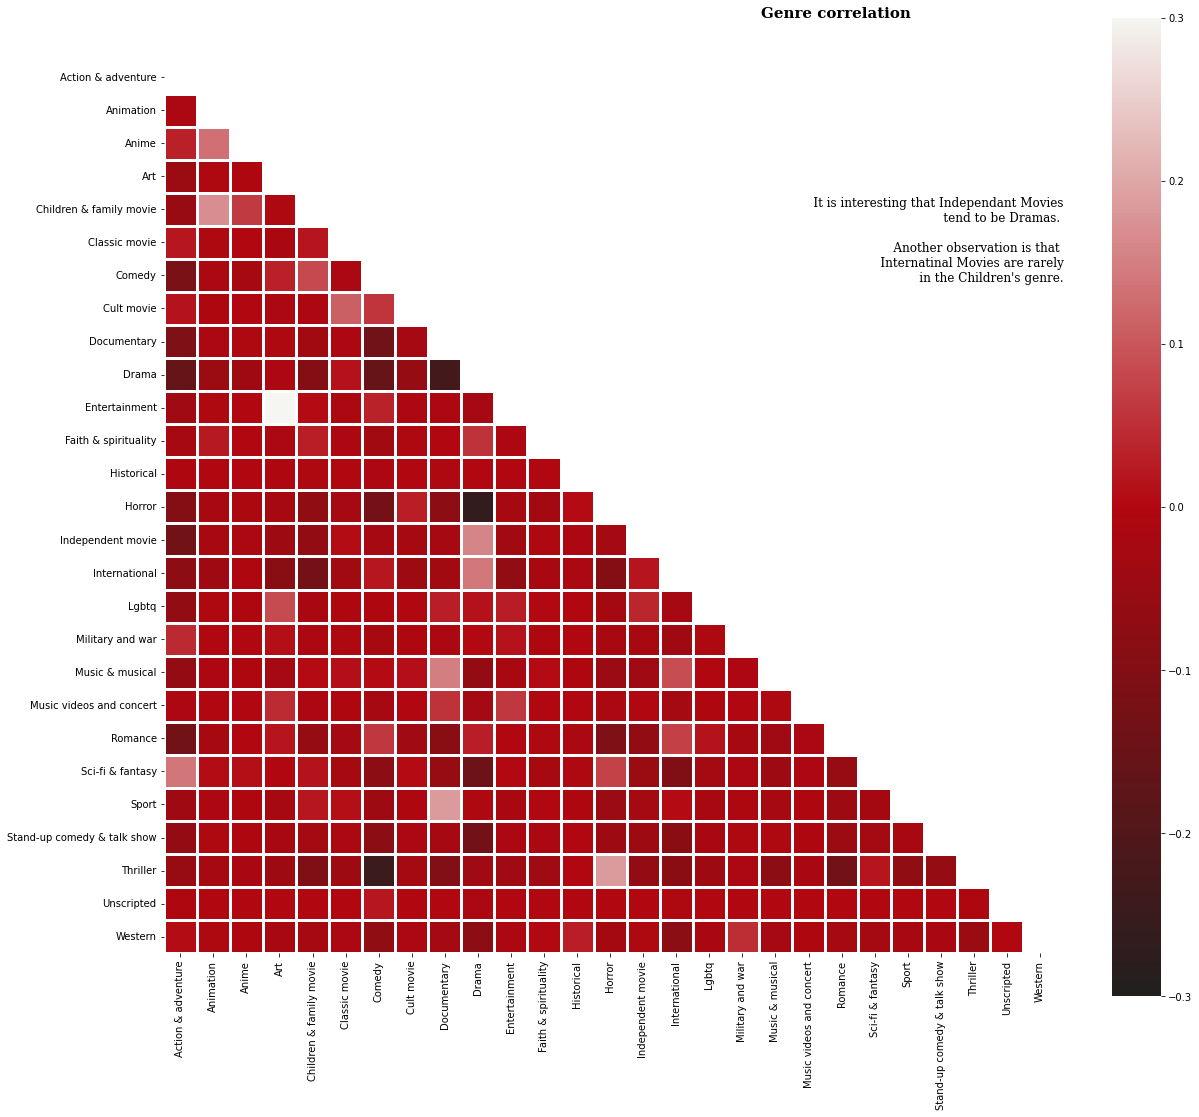

In [126]:
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])


def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(20, 18))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()
    
df_show = df.copy()

df_tv = df_show[df_show["type"] == "TV Show"]
df_movies = df_show[df_show["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')

/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/1107582396.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/1107582396.py:15: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



There are 32 types in the Netflix Movie Dataset


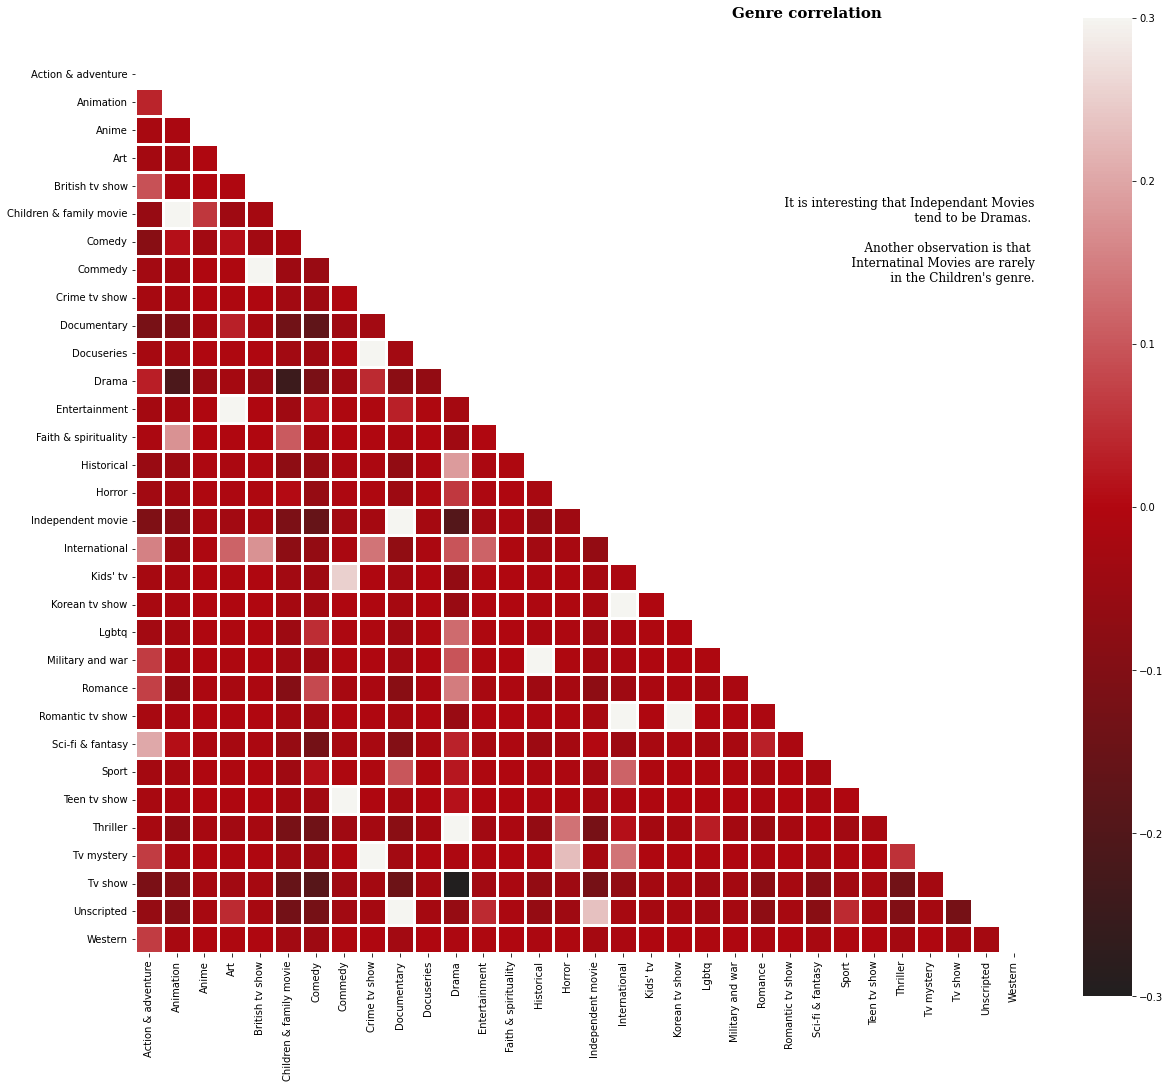

In [246]:
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])


def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(20, 18))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

df_tv = df_amazon[df_amazon["type"] == "TV Show"]
df_movies = df_amazon[df_amazon["type"] == "Movie"]


genre_heatmap(df_tv, 'Movie')
plt.show()

/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/1107582396.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/1107582396.py:15: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



There are 22 types in the Netflix TV Show Dataset


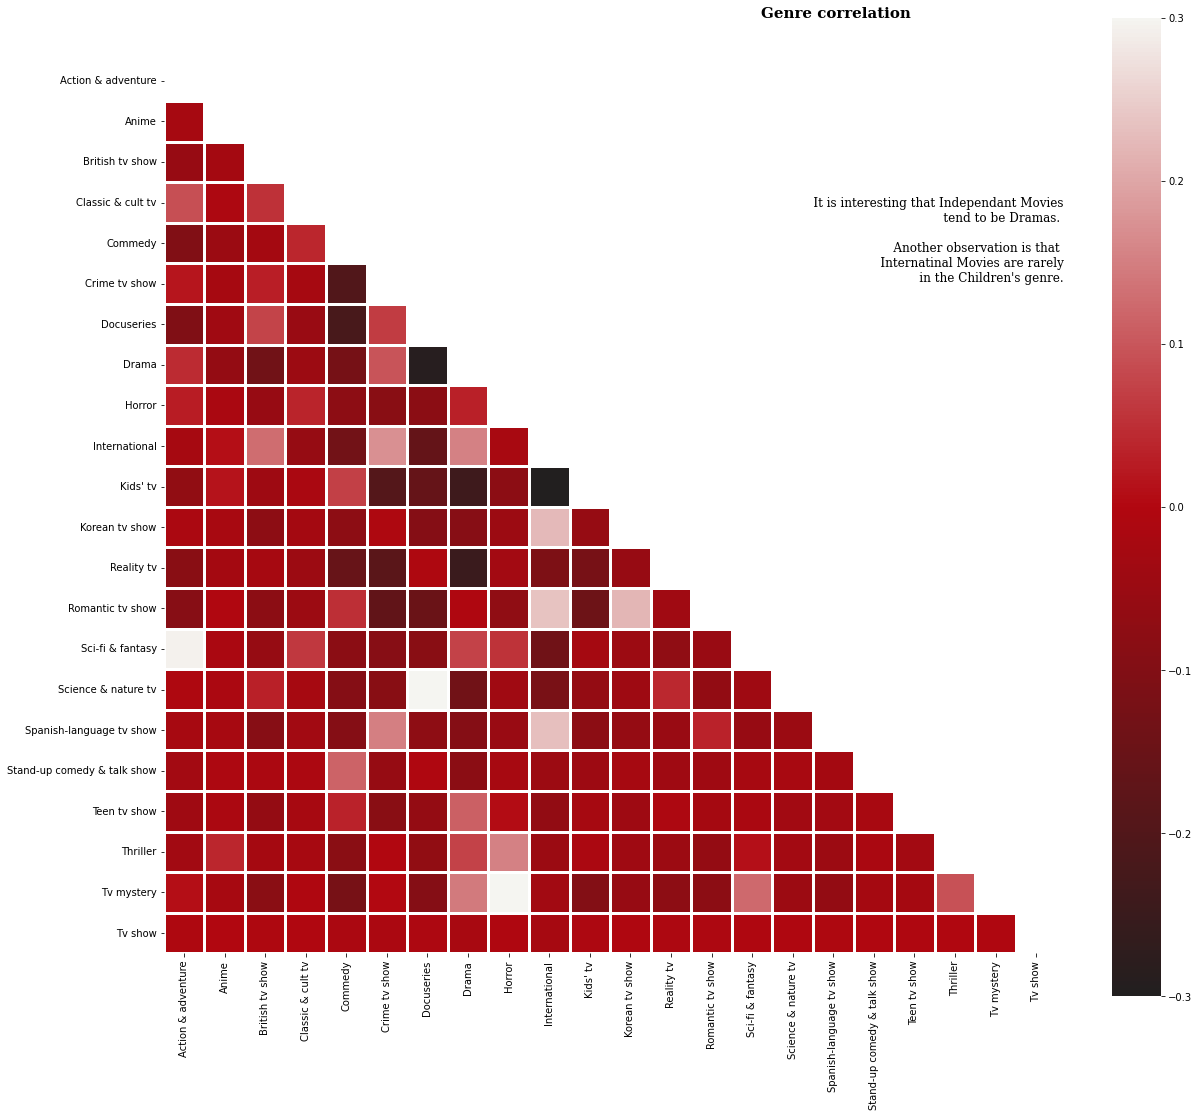

In [247]:
df_movies = df_netflix[df_netflix["type"] == "TV Show"]


genre_heatmap(df_movies, 'TV Show')
plt.show()

# How Old movies?

In [129]:
df = data.copy()
df['country'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['country'])
df['date_added_netflix'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['date_added_netflix'])
df['date_added_netflix'] = pd.to_datetime(df['date_added_netflix'])
df['year_added_netflix'] = df['date_added_netflix'].dt.year
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]
df = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
df

,first_country,count
0,USA,1512
1,India,696
2,UK,236
3,Canada,107
4,France,95
5,Nigeria,77
6,Spain,72
7,Hong Kong,61
8,Philippines,59
9,Germany,51


/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/1689595061.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



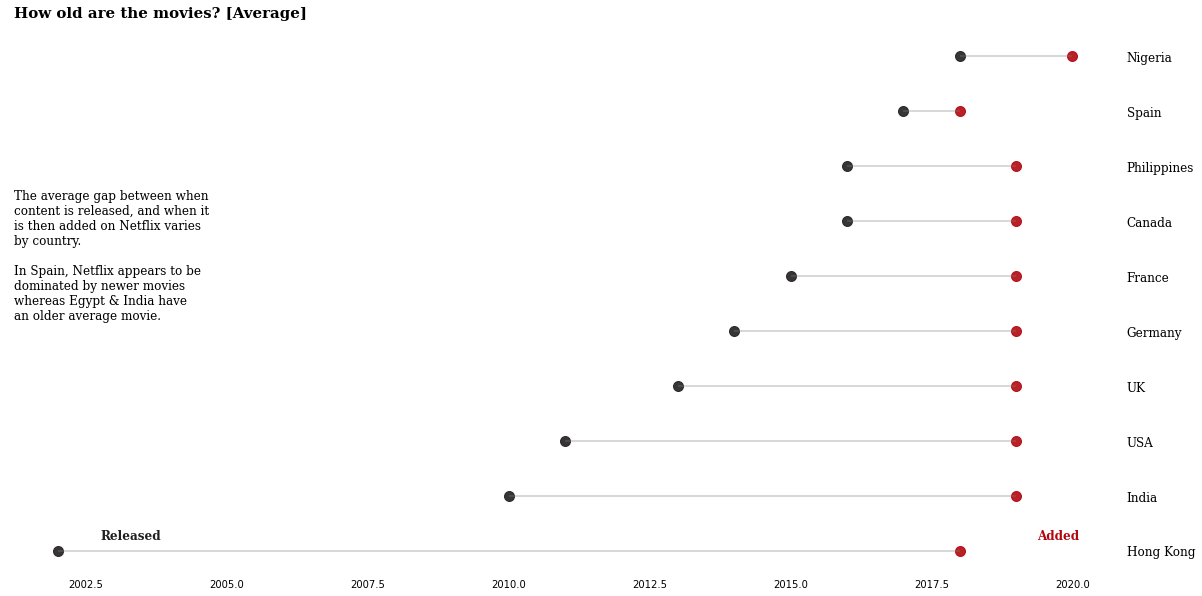

In [130]:
df = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
df = df['first_country']
df_loli = df_movies.loc[df_movies['first_country'].isin(df)]

loli = df_loli.groupby('first_country')['release_year','year_added_netflix'].mean().round()


# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(20, 10))

fig.text(0.13, 0.9, 'How old are the movies? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added_netflix'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added_netflix'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)

# Custome legend
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.84,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')


fig.text(0.13, 0.46, 
'''The average gap between when 
content is released, and when it
is then added on Netflix varies
by country. 

In Spain, Netflix appears to be 
dominated by newer movies 
whereas Egypt & India have
an older average movie.
'''
, fontsize=12, fontweight='light', fontfamily='serif')


#plt.xlabel('Year')
#plt.ylabel('Country')
plt.show()

In [131]:
df = data.copy()
df['country'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['country'])
df['date_added_amazon'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['date_added_netflix'])
df['date_added_amazon'] = pd.to_datetime(df['date_added_amazon'])
df['year_added_amazon'] = df['date_added_amazon'].dt.year
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]
df = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
df

,first_country,count
0,USA,2449
1,India,1118
2,UK,346
3,Canada,178
4,France,122
5,Hong Kong,88
6,Spain,86
7,Nigeria,78
8,Germany,68
9,Australia,65


/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/4177974716.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



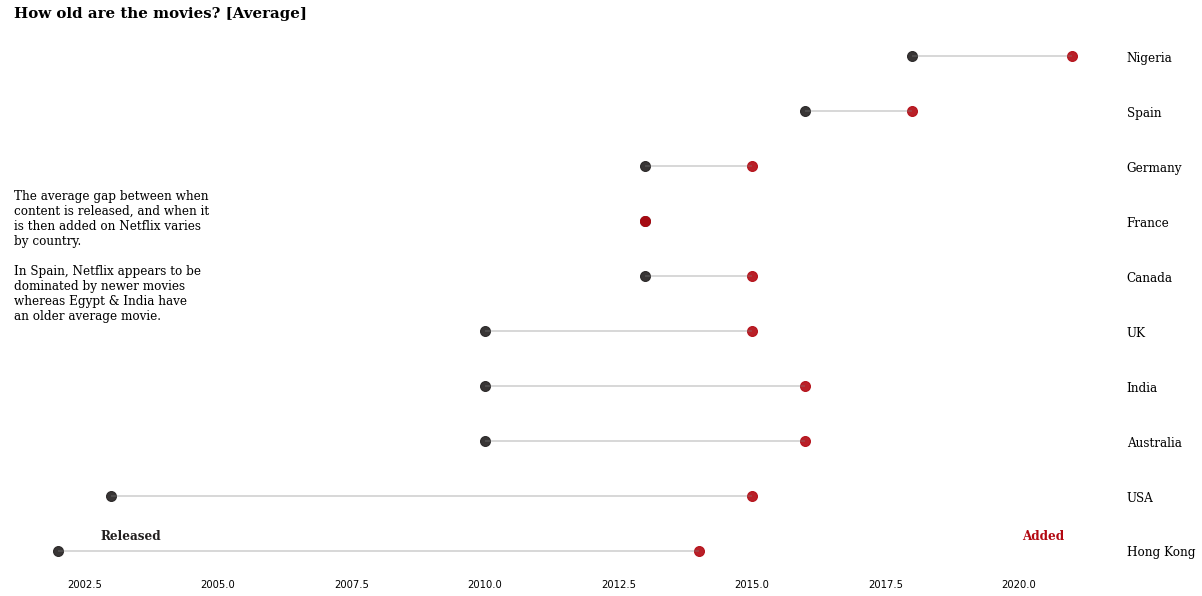

In [132]:
df = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
df = df['first_country']
df_loli = df_movies.loc[df_movies['first_country'].isin(df)]

loli = df_loli.groupby('first_country')['release_year','year_added_amazon'].mean().round()


# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(20, 10))

fig.text(0.13, 0.9, 'How old are the movies? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added_amazon'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added_amazon'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)

# Custome legend
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.83,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')


fig.text(0.13, 0.46, 
'''The average gap between when 
content is released, and when it
is then added on Netflix varies
by country. 

In Spain, Netflix appears to be 
dominated by newer movies 
whereas Egypt & India have
an older average movie.
'''
, fontsize=12, fontweight='light', fontfamily='serif')


#plt.xlabel('Year')
#plt.ylabel('Country')
plt.show()

# Distributors distribution

In [562]:
df = data.copy()
df['distributor'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['distributor'])
df.columns

Index(['type', 'imdb_id', 'title', 'director', 'director_gender', 'cast',
       'distributor', 'country', 'languages', 'release_year', 'rating',
       'duration', 'listed_in', 'netflix', 'amazon', 'date_added_netflix',
       'date_added_amazon', 'imDbRating', 'imDbRatingVotes', 'rottenTomatoes',
       'budget', 'gross', 'description', 'keywords', 'awards',
       'special_award_name', 'special_award_tot', 'special_award_stat',
       'award_nomination_tot', 'award_win_tot', 'count', 'first_country'],
      dtype='object')

In [563]:
df['distr'] = df['distributor'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

df_new = pd.DataFrame()
j = 0
for index, i in df['distr'].iteritems(): 
    for n in range(len(i)):
        w = i[n]
        df_new.loc[j, 'distributor'] = w
        df_new.loc[j, 'release_year'] = df._get_value(index, 'release_year')
        df_new.loc[j, 'count'] = df._get_value(index, 'count')
        j += 1

df_new

,distributor,release_year,count
0,Netflix,2021.0,1.0
1,BBC One,2021.0,1.0
2,Netflix,2021.0,1.0
3,Mon Amour Film,2021.0,1.0
4,Nutopia,2021.0,1.0
...,...,...,...
6814,Netflix,1999.0,1.0
6815,ITV,1983.0,1.0
6816,Netflix,2008.0,1.0
6817,Amazon Prime Video,2021.0,1.0


In [564]:
df = df[['release_year', 'distributor']].groupby('distributor')['release_year'].value_counts().unstack()
df = df.stack().reset_index()
df.columns = ['distributor','year','val']
df = df[(df.year >= 2008)&(df.year < 2022)]
df = df.sort_values(by='val', ascending=False)[:50]
df

,distributor,year,val
1566,Netflix,2020.0,307.0
1564,Netflix,2018.0,258.0
1565,Netflix,2019.0,227.0
1563,Netflix,2017.0,224.0
1562,Netflix,2016.0,220.0
1567,Netflix,2021.0,174.0
1561,Netflix,2015.0,121.0
1560,Netflix,2014.0,86.0
1559,Netflix,2013.0,51.0
1556,Netflix,2010.0,50.0


In [566]:
fig = px.histogram(df, x="year", y="val", color='distributor')
fig.show()

# Distributor and genre 

In [522]:
df = data.copy()
df['listed_in'].replace('no_data', np.nan, inplace  = True)
df['distributor'].replace('no_data', np.nan, inplace  = True)
df = df.query('listed_in.notnull() & distributor.notnull()')
df[['listed_in', 'distributor']]

,listed_in,distributor
0,"Drama, Horror, Tv mystery",Netflix
2,"British tv show, Reality tv",BBC One
3,"Comedy, Drama",Netflix
4,"Crime tv show, Docuseries, International","Mon Amour Film, Nutopia"
5,"Children & family movie, Comedy",Netflix
...,...,...
8305,"Comedy, Drama, Romance","Disney+, Netflix"
8307,Tv show,ITV
8309,Action & adventure,Netflix
8310,"Drama, Sport",Amazon Prime Video


In [523]:
df['distr'] = df['distributor'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
genre = []
distr = []
for i, x in df['genre'].iteritems():
    for n in range(len(x)):
        k = df._get_value(i, 'distr')
        for num in range(len(k)):
            genre.append(x[n])
            distr.append(k[num])
df = pd.DataFrame()
df['distr'] = distr
df['genre'] = genre
df['count'] = 1
df

,distr,genre,count
0,Netflix,Drama,1
1,Netflix,Horror,1
2,Netflix,Tv mystery,1
3,BBC One,British tv show,1
4,BBC One,Reality tv,1
...,...,...,...
14593,Amazon Prime Video,Drama,1
14594,Amazon Prime Video,Sport,1
14595,Lionsgate,Action & adventure,1
14596,Lionsgate,Drama,1


In [524]:
g = df.groupby('genre')[['genre','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
g = g['genre']

d = df.groupby('distr')[['distr','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
d = d['distr']
d

df_heatmap = df.loc[df['genre'].isin(g) & df['distr'].isin(d)]
df_heatmap

,distr,genre,count
0,Netflix,Drama,1
1,Netflix,Horror,1
5,Netflix,Comedy,1
6,Netflix,Drama,1
13,Netflix,Children & family movie,1
...,...,...,...
14586,Netflix,Comedy,1
14588,Netflix,Drama,1
14590,Netflix,Romance,1
14592,Netflix,Action & adventure,1


In [526]:
df_heatmap = pd.crosstab(df_heatmap['distr'],df_heatmap['genre'],normalize = "index").T
df_heatmap

distr,20th Century Studios,Amazon Prime Video,Columbia Pictures,InterCom,Netflix,Paramount Pictures,UTV Motion Pictures,United Artists Corporation,Universal Pictures,Warner Bros.
genre,,,,,,,,,,
Action & adventure,0.052632,0.088710,0.189320,0.236220,0.104755,0.174074,0.093458,0.112245,0.129944,0.165217
Children & family movie,0.073684,0.080645,0.043689,0.055118,0.029447,0.066667,0.000000,0.030612,0.050847,0.030435
Comedy,0.210526,0.217742,0.247573,0.165354,0.135168,0.214815,0.168224,0.173469,0.175141,0.152174
Drama,0.284211,0.362903,0.242718,0.196850,0.254646,0.251852,0.252336,0.367347,0.271186,0.247826
Horror,0.084211,0.040323,0.029126,0.078740,0.052378,0.044444,0.009346,0.071429,0.067797,0.060870
Independent movie,0.031579,0.008065,0.024272,0.000000,0.059377,0.014815,0.000000,0.010204,0.033898,0.026087
International,0.073684,0.040323,0.029126,0.007874,0.205407,0.037037,0.373832,0.000000,0.073446,0.091304
Romance,0.021053,0.024194,0.097087,0.039370,0.050447,0.055556,0.046729,0.102041,0.045198,0.047826
Sci-fi & fantasy,0.052632,0.048387,0.019417,0.110236,0.033551,0.040741,0.000000,0.030612,0.039548,0.073913


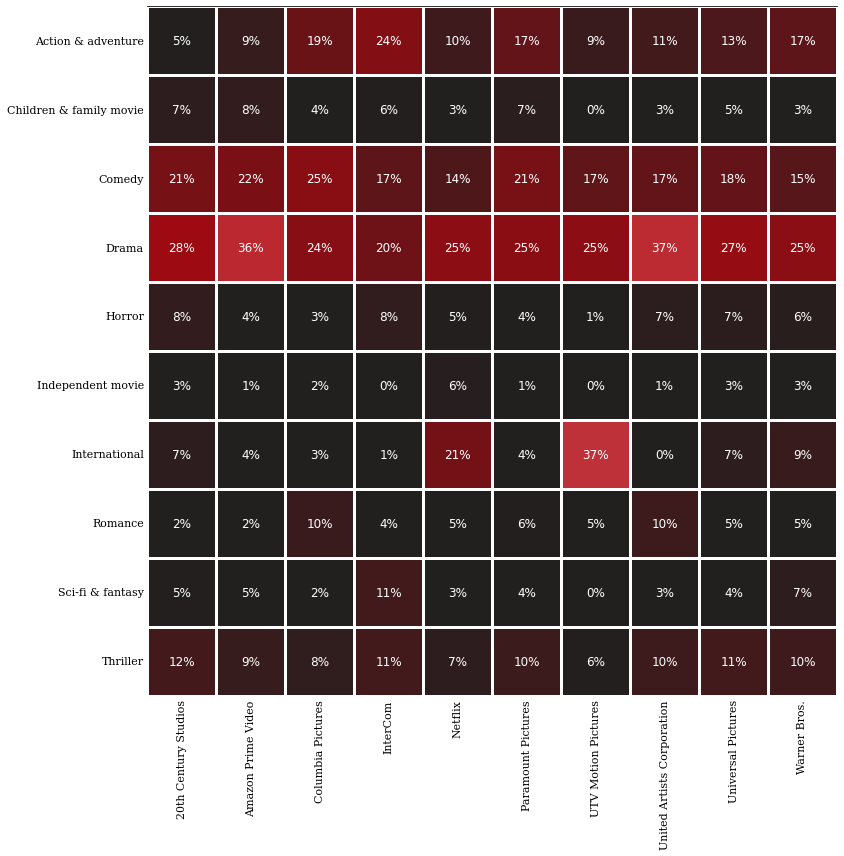

In [528]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

sns.heatmap(df_heatmap.loc[df_heatmap.index,df_heatmap.columns],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

# Distributor and Special Award 

In [544]:
df = data.copy()
df['special_award_tot'].replace('no_data', np.nan, inplace  = True)
df['special_award_name'].replace('no_data', np.nan, inplace  = True)
df['distributor'].replace('no_data', np.nan, inplace  = True)
df = df.query('special_award_name.notnull() & distributor.notnull()')
df[['special_award_name', 'special_award_tot', 'distributor']]

,special_award_name,special_award_tot,distributor
0,Primetime Emmy,1,Netflix
2,BAFTA Award,2,BBC One
3,Awards,1,Netflix
5,Awards,1,Netflix
7,Awards,1,Netflix
...,...,...,...
8300,Awards,1,"InterCom, 20th Century Studios"
8301,Oscar,2,"Netflix, InterCom"
8302,Awards,1,"Netflix, Vudu"
8305,Awards,1,"Disney+, Netflix"


In [550]:
df['distr'] = df['distributor'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
df['special'] = df['special_award_name'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
df['tot'] = df['special_award_tot'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
spe = []
distr = []
for i, x in df['distr'].iteritems():
    for n in range(len(x)):
        k = df._get_value(i, 'special')
        for num in range(len(k)):
            t = df._get_value(i, 'tot')
            for tot in t:
                for u in range(int(tot)):
                    spe.append(k[num])
                    distr.append(x[n])

df = pd.DataFrame()
df['distr'] = distr
df['award'] = spe
df['count'] = 1
df

,distr,award,count
0,Netflix,Primetime Emmy,1
1,BBC One,BAFTA Award,1
2,BBC One,BAFTA Award,1
3,Netflix,Awards,1
4,Netflix,Awards,1
...,...,...,...
5808,Netflix,Awards,1
5809,Vudu,Awards,1
5810,Disney+,Awards,1
5811,Netflix,Awards,1


In [551]:
s = df.groupby('award')[['award','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
s = s['award']

d = df.groupby('distr')[['distr','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
d = d['distr']
d

df_heatmap = df.loc[df['award'].isin(s) & df['distr'].isin(d)]
df_heatmap = pd.crosstab(df_heatmap['distr'],df_heatmap['award'],normalize = "index").T
df_heatmap

distr,AMC,Amazon Prime Video,BBC One,CBS,ITV,InterCom,NBC,Netflix,Paramount Pictures,Warner Bros.
award,,,,,,,,,,
Awards,0.017751,0.368421,0.189474,0.117647,0.111111,0.355372,0.046931,0.657679,0.485294,0.459459
BAFTA Award,0.000000,0.045113,0.263158,0.000000,0.161616,0.000000,0.003610,0.019930,0.022059,0.000000
Oscar,0.000000,0.022556,0.000000,0.000000,0.000000,0.421488,0.000000,0.093200,0.382353,0.369369
Primetime Emmy,0.502959,0.360902,0.336842,0.882353,0.323232,0.000000,0.722022,0.162954,0.000000,0.000000
Top rated TV,0.479290,0.203008,0.210526,0.000000,0.404040,0.000000,0.227437,0.043962,0.000000,0.000000
Top rated movie,0.000000,0.000000,0.000000,0.000000,0.000000,0.223140,0.000000,0.022274,0.110294,0.171171


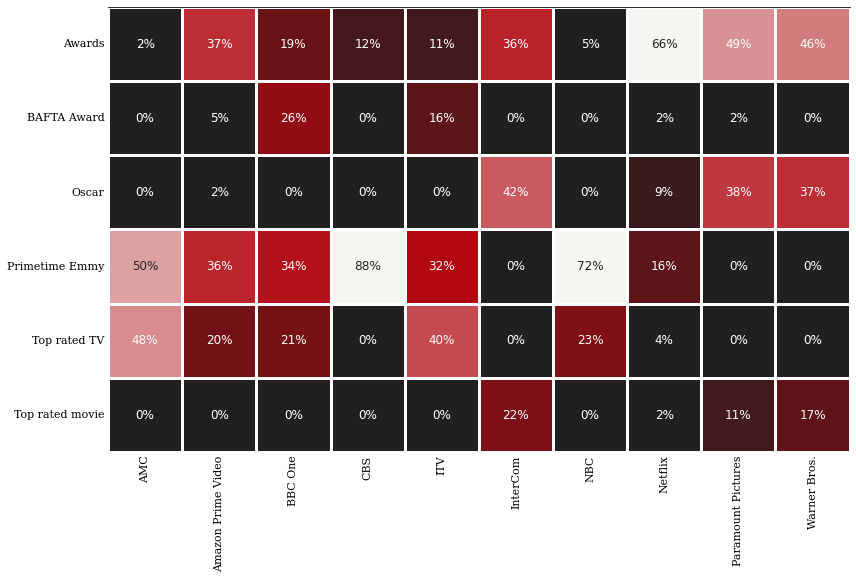

In [552]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

sns.heatmap(df_heatmap.loc[df_heatmap.index,df_heatmap.columns],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

# Genere and Special Award 

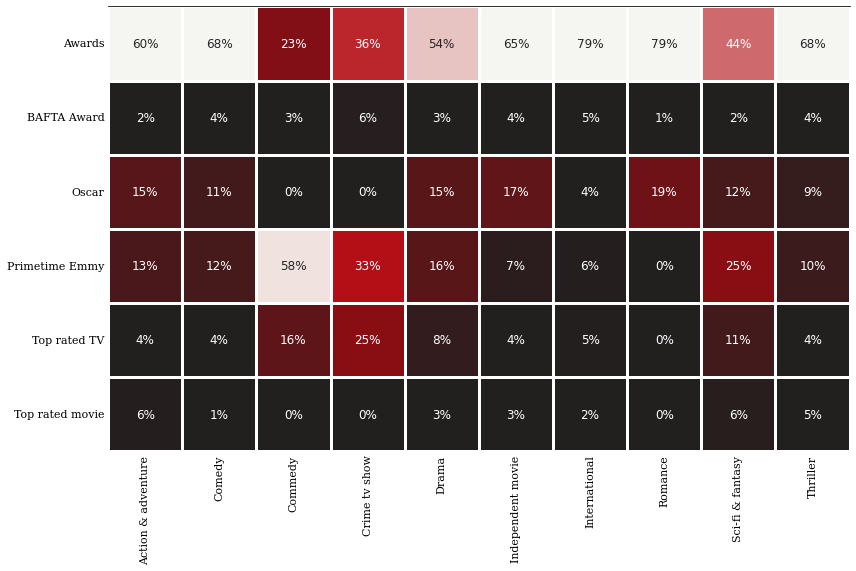

In [554]:
df = data.copy()
df['special_award_tot'].replace('no_data', np.nan, inplace  = True)
df['special_award_name'].replace('no_data', np.nan, inplace  = True)
df['listed_in'].replace('no_data', np.nan, inplace  = True)
df = df.query('special_award_name.notnull() & listed_in.notnull()')
df[['special_award_name', 'special_award_tot', 'listed_in']]
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
df['special'] = df['special_award_name'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
df['tot'] = df['special_award_tot'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
spe = []
genre = []
for i, x in df['genre'].iteritems():
    for n in range(len(x)):
        k = df._get_value(i, 'special')
        for num in range(len(k)):
            t = df._get_value(i, 'tot')
            for tot in t:
                for u in range(int(tot)):
                    spe.append(k[num])
                    genre.append(x[n])

df = pd.DataFrame()
df['genre'] = genre
df['award'] = spe
df['count'] = 1
df

g = df.groupby('genre')[['genre','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
g = g['genre']

s = df.groupby('award')[['award','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
s = s['award']

df_heatmap = df.loc[df['award'].isin(s) & df['genre'].isin(g)]
df_heatmap = pd.crosstab(df_heatmap['genre'],df_heatmap['award'],normalize = "index").T
df_heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

sns.heatmap(df_heatmap.loc[df_heatmap.index,df_heatmap.columns],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

# Critique v.s Popular opinion imdb

In [629]:
df = data.copy()
df = df[['distributor', 'rottenTomatoes', 'imDbRating', 'award_nomination_tot', 'award_win_tot' ]]
df.replace('no_data', np.nan, inplace  = True)
df.dropna(inplace=True)
df

,distributor,rottenTomatoes,imDbRating,award_nomination_tot,award_win_tot
0,Netflix,86.0,77.0,29.0,4.0
2,BBC One,89.0,86.0,21.0,10.0
7,Netflix,86.0,61.0,36.0,5.0
15,Netflix,35.0,59.0,4.0,3.0
19,Netflix,95.0,84.0,60.0,16.0
...,...,...,...,...,...
8296,"20th Century Studios, Disney+",84.0,80.0,10.0,7.0
8300,"InterCom, 20th Century Studios",63.0,70.0,4.0,2.0
8301,"Netflix, InterCom",77.0,78.0,112.0,72.0
8302,"Netflix, Vudu",40.0,55.0,5.0,2.0


In [630]:
df['distr'] = df['distributor'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

df_new = pd.DataFrame()
j = 0 
for index, i in df['distr'].iteritems(): 
    for n in range(len(i)):
        w = i[n]
        df_new.loc[j, 'distributor'] = w
        df_new.loc[j, 'count'] = 1
        df_new.loc[j, 'rottenTomatoes'] = float(df._get_value(index, 'rottenTomatoes'))
        df_new.loc[j, 'imDbRating'] = float(df._get_value(index, 'imDbRating'))
        df_new.loc[j, 'award_nomination_tot'] = float(df._get_value(index, 'award_nomination_tot'))
        df_new.loc[j, 'award_win_tot'] = float(df._get_value(index, 'award_win_tot'))
        j += 1

df_new

,distributor,count,rottenTomatoes,imDbRating,award_nomination_tot,award_win_tot
0,Netflix,1.0,86.0,77.0,29.0,4.0
1,BBC One,1.0,89.0,86.0,21.0,10.0
2,Netflix,1.0,86.0,61.0,36.0,5.0
3,Netflix,1.0,35.0,59.0,4.0,3.0
4,Netflix,1.0,95.0,84.0,60.0,16.0
...,...,...,...,...,...,...
1709,InterCom,1.0,77.0,78.0,112.0,72.0
1710,Netflix,1.0,40.0,55.0,5.0,2.0
1711,Vudu,1.0,40.0,55.0,5.0,2.0
1712,Disney+,1.0,69.0,73.0,13.0,2.0


In [631]:
order = pd.DataFrame(df_new.groupby('distributor')['count', 'rottenTomatoes', 'imDbRating', 'award_nomination_tot', 'award_win_tot'].sum().sort_values(by='count', ascending=False).reset_index())[:10]
order

/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/1725044498.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,distributor,count,rottenTomatoes,imDbRating,award_nomination_tot,award_win_tot
0,Netflix,597.0,41707.0,40969.0,12243.0,5588.0
1,Paramount Pictures,53.0,3515.0,3555.0,923.0,429.0
2,InterCom,46.0,2896.0,3199.0,2097.0,1247.0
3,Warner Bros.,44.0,2898.0,3092.0,1018.0,538.0
4,Columbia Pictures,42.0,2424.0,2698.0,427.0,152.0
5,Universal Pictures,31.0,2077.0,2109.0,412.0,184.0
6,UIP-Dunafilm,31.0,2079.0,2092.0,1512.0,540.0
7,Amazon Prime Video,24.0,2038.0,1795.0,727.0,280.0
8,20th Century Studios,24.0,1674.0,1692.0,630.0,302.0
9,Vudu,21.0,1436.0,1455.0,456.0,267.0


In [632]:

distr = []
val_name = []
val = []
for i, x in order.iterrows():
    total = x['count']

    if x['rottenTomatoes'] > 0:
        distr.append(x['distributor'])
        val_name.append('Rotten Tomatoes')
        val.append(int(x['rottenTomatoes']/total))
    if x['imDbRating'] > 0:
        distr.append(x['distributor'])
        val_name.append('iMDb Rating')
        val.append(int(x['imDbRating']/total))
    if x['award_nomination_tot'] > 0:
        distr.append(x['distributor'])
        val_name.append('Award nomination')
        val.append(int(x['award_nomination_tot']/total))
    if x['award_win_tot'] > 0:
        distr.append(x['distributor'])
        val_name.append('Award win')
        val.append(int(x['award_win_tot']/total))
df = pd.DataFrame()
df['distr'] = distr
df['val_name'] = val_name
df['val'] = val
df

,distr,val_name,val
0,Netflix,Rotten Tomatoes,69
1,Netflix,iMDb Rating,68
2,Netflix,Award nomination,20
3,Netflix,Award win,9
4,Paramount Pictures,Rotten Tomatoes,66
5,Paramount Pictures,iMDb Rating,67
6,Paramount Pictures,Award nomination,17
7,Paramount Pictures,Award win,8
8,InterCom,Rotten Tomatoes,62
9,InterCom,iMDb Rating,69


In [633]:
fig = px.histogram(df, x="distr", y="val",
             color='val_name', barmode='group',
             height=400)
fig.show()

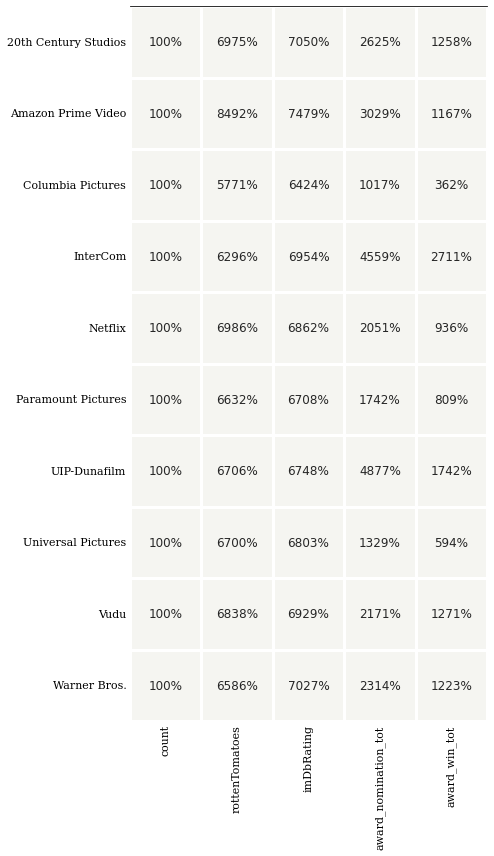

In [600]:
d = df_new.groupby('distributor')[['distributor','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
d = d['distributor']
d

df_heatmap = df_new.loc[df_new['distributor'].isin(d)]
df_heatmap = df_heatmap.groupby('distributor').mean()

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

sns.heatmap(df_heatmap.loc[df_heatmap.index,df_heatmap.columns],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()
